In [127]:
import pygad
import numpy
import time

items = ["zegar", "obraz-pejzaż", "obraz-portret", "radio", "laptop", "lampka nocna", "srebrne sztućce", "porcelana", "figura z brązu", "skórzana torebka", "odkurzacz"]
values = [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
weights = [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]
limit = 25

In [128]:
#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]


In [129]:
#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    solution_value = numpy.sum(solution * values)
    solution_weight = numpy.sum(solution * weights)
    if solution_weight > limit:
        fitness = 0
    else:
        fitness = solution_value
    return fitness

fitness_function = fitness_func

In [130]:
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 20
num_genes = len(items)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 10
num_generations = 60
keep_parents = 4

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

In [131]:
average_time = 0

for i in range(10):
    start = time.time()
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria="reach_1600")

    #uruchomienie algorytmu
    ga_instance.run()
    end = time.time()
    average_time += end - start
print("Average time: ", average_time/10)

Average time:  0.1076540231704712


Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
Predicted output based on the best solution : 1630.0
Number of generations passed is 60
Time taken to run the program is 0.11359310150146484


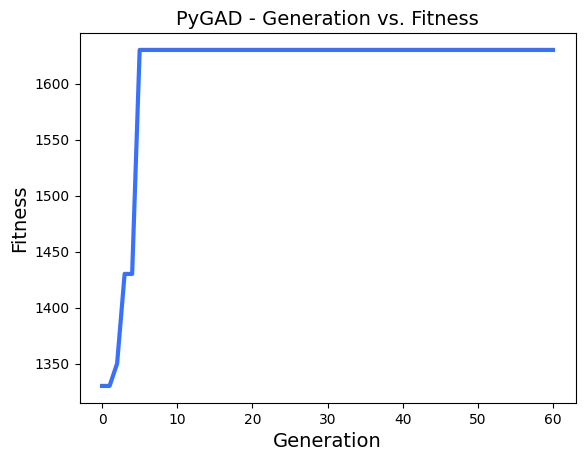

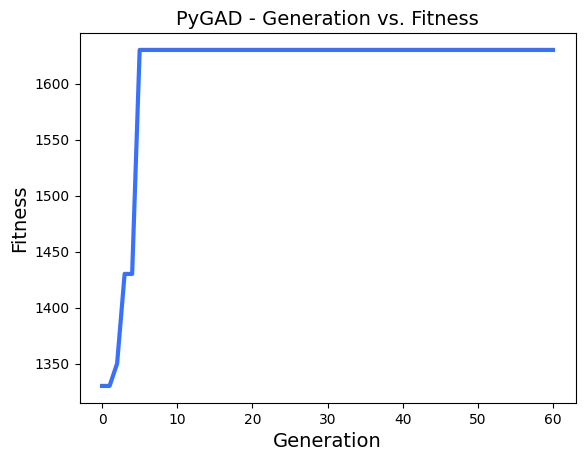

In [132]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(values*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#liczba generacji algorytmu
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

#czas wykonania algorytmu
print("Time taken to run the program is {time}".format(time=end-start))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()